(1, 3, 3, 1)


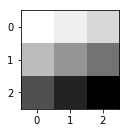

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 3, 3, 1)
[[ 12.  16.   9.]
 [ 24.  28.  15.]
 [ 15.  17.   9.]]


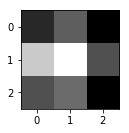

In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

sess = tf.InteractiveSession()
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]], 
                   [[7],[8],[9]]]], dtype=np.float32)
print(image.shape)
plt.imshow(image.reshape(3,3), cmap='Greys')
plt.show();
print("image.shape", image.shape)
weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')
    plt.show();


(1, 3, 3, 1)


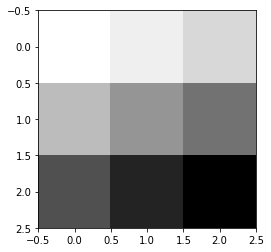

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 3)
conv2d_img.shape (1, 3, 3, 3)
[[ 12.  16.   9.]
 [ 24.  28.  15.]
 [ 15.  17.   9.]]


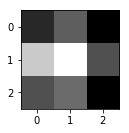

[[ 120.  160.   90.]
 [ 240.  280.  150.]
 [ 150.  170.   90.]]


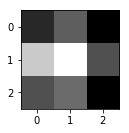

[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


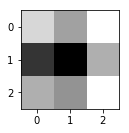

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

sess = tf.InteractiveSession()
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]], 
                   [[7],[8],[9]]]], dtype=np.float32)
print(image.shape)
plt.imshow(image.reshape(3,3), cmap='Greys')
plt.show();
print("image.shape", image.shape)
weight = tf.constant([[[[1.,10.,-1.]],[[1.,10.,-1.]]],
                      [[[1.,10.,-1.]],[[1.,10.,-1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')
    plt.show();


In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
sess = tf.InteractiveSession()
image = np.array([[[[4],[3]],sess = tf.InteractiveSession()
                 [[2],[1]]]],dtype=np.float32)
pool = tf.nn.max_pool(image,ksize=[1,2,2,1],strides=[1,1,1,1],padding='SAME')

print(pool.shape)
print(pool.eval())


(1, 2, 2, 1)
[[[[ 4.]
   [ 3.]]

  [[ 2.]
   [ 1.]]]]


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


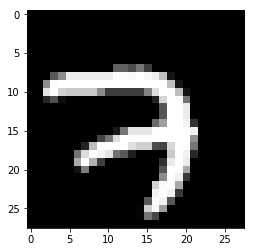

Tensor("Conv2D_5:0", shape=(1, 14, 14, 5), dtype=float32)


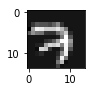

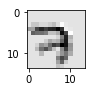

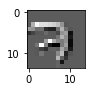

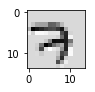

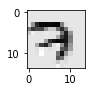

Tensor("MaxPool_1:0", shape=(1, 7, 7, 5), dtype=float32)


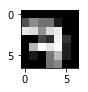

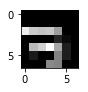

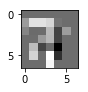

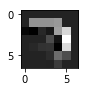

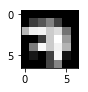

In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

img = mnist.train.images[0].reshape(28,28)
plt.imshow(img,cmap='gray')
plt.show()


sess = tf.InteractiveSession()
img = img.reshape(-1,28,28,1)
W1 = tf.Variable(tf.random_normal([3,3,1,5],stddev=0.01))
conv2d = tf.nn.conv2d(img,W1,strides=[1,2,2,1],padding='SAME')
print(conv2d)

sess.run(tf.global_variables_initializer())

conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img,0,3)

for i, one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1),plt.imshow(one_img.reshape(14,14),cmap='gray')
    plt.show()
    
pool = tf.nn.max_pool(conv2d,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
print(pool)
sess.run(tf.global_variables_initializer())
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img,0,3)
for i,one_img in enumerate(pool_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(7,7),cmap='gray')
    plt.show()

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

X = tf.placeholder(tf.float32,[None,784])
X_img = tf.reshape(X,[-1,28,28,1])
Y = tf.placeholder(tf.float32,[None,10])

W1 = tf.Variable(tf.random_normal([3,3,1,32],stddev=0.01))

L1 = tf.nn.conv2d(X_img,W1,strides=[1,1,1,1],padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1,ksize = [1,2,2,1],strides = [1,2,2,1],padding='SAME')

W2 = tf.Variable(tf.random_normal([3,3,32,64],stddev=0.01))

L2 = tf.nn.conv2d(L1,W2,strides = [1,1,1,1],padding = 'SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2,ksize = [1,2,2,1],strides=[1,2,2,1],padding='SAME')
L2 = tf.reshape(L2,[-1,7*7*64])

print(L2)

W3 = tf.get_variable("W3",shape = [7*7*64,10],initializer =tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2,W3)+b

learning_rate = 0.01
training_epochs = 3
batch_size =100

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis,labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    print('Learning start. It takes sometime')
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch =int(mnist.train.num_examples/batch_size)
        for i in range(total_batch):
            batch_xs,batch_ys = mnist.train.next_batch(batch_size)
            feed_dict = {X:batch_xs,Y:batch_ys}
            c,_,=sess.run([cost,optimizer],feed_dict=feed_dict)
            avg_cost +=c/total_batch
        print('Epoch: ','%04d'%(epoch+1),'cost =','{:.9f}'.format(avg_cost))
    print('Learning Finished')
    
    correct_prediction = tf.equal(tf.argmax(hypothesis,1),tf.argmax(Y,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    print('Accuracy: ',sess.run(accuracy,feed_dict={X:mnist.test.images, Y:mnist.test.labels}))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Tensor("Reshape_1:0", shape=(?, 3136), dtype=float32)
Learning start. It takes sometime
Epoch:  0001 cost = 0.164064034
Epoch:  0002 cost = 0.053314497
Epoch:  0003 cost = 0.045065605
Learning Finished
Accuracy:  0.985
